<a href="https://colab.research.google.com/github/SIRIGIREDDYDHANALAXMI/Knight-ML-assiignment_1/blob/master/KnightML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
Train = pd.read_csv("//content/drive/My Drive/Knight ML Assignment/Knight ML Assignment/Data/train.csv")
Test = pd.read_csv("//content/drive/My Drive/Knight ML Assignment/Knight ML Assignment/Data/test.csv")

(82657, 12)
(20665, 11)
user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64
user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


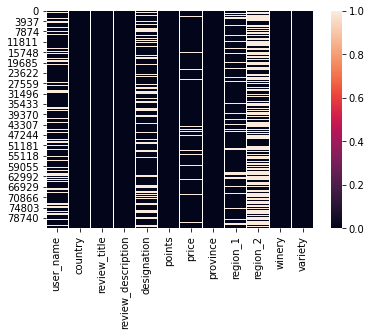

In [3]:
print(Train.shape)
print(Test.shape)
print(Train.isnull().sum())
print(Test.isnull().sum())
print(sns.heatmap(Train.isnull()))

In [0]:

Train['country']=Train['country'].fillna(Train['country'].mode()[0])
Train['price']=Train['price'].fillna(Train['price'].mode()[0])
Train['province']=Train['province'].fillna(Train['province'].mode()[0])



Test['country']=Test['country'].fillna(Test['country'].mode()[0])

Test['price']=Test['price'].fillna(Test['price'].mode()[0])
Test['province']=Test['province'].fillna(Test['province'].mode()[0])

In [0]:
#drop user_is column
traindata= Train.drop('user_name',axis=1)
traindata= Train.drop('region_2',axis=1)



In [0]:
Test = Test.drop('user_name',axis=1)
Test = Test.drop('region_2',axis=1)

In [7]:
print(traindata.dtypes)
print(Test.dtypes)

user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
winery                 object
variety                object
dtype: object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
winery                 object
dtype: object


In [8]:
Test.columns

Index(['country', 'review_title', 'review_description', 'designation',
       'points', 'price', 'province', 'region_1', 'winery'],
      dtype='object')

In [0]:

tracols = ['country','review_title','review_description','designation','province','region_1','winery']#region_2
for i in tracols:
  traindata[i]= traindata[i].astype('category')

  Test[i]= Test[i].astype('category')


In [10]:

print(traindata.dtypes)
print(Test.dtypes)

user_name               object
country               category
review_title          category
review_description    category
designation           category
points                   int64
price                  float64
province              category
region_1              category
winery                category
variety                 object
dtype: object
country               category
review_title          category
review_description    category
designation           category
points                   int64
price                  float64
province              category
region_1              category
winery                category
dtype: object


In [0]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [12]:
print(traindata['variety'].isnull().sum())
print(traindata['variety'].unique())

0
['Chardonnay' 'Red Blend' 'Nebbiolo' 'Bordeaux-style White Blend' 'Malbec'
 'Cabernet Sauvignon' 'Zinfandel' 'Pinot Noir' 'Sauvignon Blanc' 'Gamay'
 'Grüner Veltliner' 'Bordeaux-style Red Blend' 'Sangiovese' 'Syrah'
 'White Blend' 'Cabernet Franc' 'Portuguese Red' 'Portuguese White'
 'Rhône-style Red Blend' 'Rosé' 'Champagne Blend' 'Merlot' 'Riesling'
 'Sparkling Blend' 'Pinot Grigio' 'Tempranillo' 'Pinot Gris'
 'Gewürztraminer']


In [13]:
traindata["variety"] = traindata["variety"].map({'Chardonnay':0, 'Red Blend':1, 'Nebbiolo':2, 'Bordeaux-style White Blend':3, 'Malbec':4,
 'Cabernet Sauvignon':5, 'Zinfandel':6, 'Pinot Noir':7, 'Sauvignon Blanc':8, 'Gamay':9,
 'Grüner Veltliner':10, 'Bordeaux-style Red Blend':11, 'Sangiovese':12, 'Syrah':13,
 'White Blend':14, 'Cabernet Franc':15, 'Portuguese Red':16, 'Portuguese White':17,
 'Rhône-style Red Blend':18, 'Rosé':19, 'Champagne Blend':20, 'Merlot':21 ,'Riesling':22,
 'Sparkling Blend':23, 'Pinot Grigio':24, 'Tempranillo':25, 'Pinot Gris':26,
 'Gewürztraminer':27})
    
     
print(traindata['variety'].isnull().sum())

0


In [0]:
le=LabelBinarizer(sparse_output='True')
traindata['country']=traindata['country'].astype(str)
Test['country']=Test['country'].astype(str)
country= le.fit_transform(traindata['country'])
tescountry= le.fit_transform(Test['country'])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
winery = cv.fit_transform(traindata['winery'].values.astype('U'))
province = cv.fit_transform(traindata['province'].values.astype('U'))
designation = cv.fit_transform(traindata['designation'].values.astype('U'))
region1= cv.fit_transform(traindata['region_1'].values.astype('U'))


teswinery = cv.fit_transform(Test['winery'].values.astype('U'))
tesprovince = cv.fit_transform(Test['province'].values.astype('U'))
tesdesignation = cv.fit_transform(Test['designation'].values.astype('U'))
tesregion1= cv.fit_transform(Test['region_1'].values.astype('U'))


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(ngram_range = (1,3) , stop_words = "english")
title= tfv.fit_transform(traindata['review_title'].values.astype('U'))
description = tfv.fit_transform(traindata['review_description'].values.astype('U'))

In [0]:
from scipy.sparse import csr_matrix, hstack
points=pd.get_dummies(traindata['points'],sparse='True').values
price =pd.get_dummies(traindata['price'],sparse='True').values


In [0]:
frame = hstack((region1,province,winery,designation,title,description,points,price,country),format='csr')#region_2
temp = np.array(np.clip(frame.getnnz(axis=0) - 1, 0, 1), dtype=bool)
frame=frame[:,temp]

In [0]:
testitle= tfv.fit_transform(Test['review_title'].values.astype('U'))
tesdescription = tfv.fit_transform(Test['review_description'].values.astype('U'))

tespoints=pd.get_dummies(Test['points'],sparse='True').values
tesprice =pd.get_dummies(Test['price'],sparse='True').values

In [0]:
testframe = hstack((tesregion1,tesprovince,teswinery,tesdesignation,testitle,tesdescription,tespoints,tesprice,tescountry)).tocsr()
testemp = np.array(np.clip(testframe.getnnz(axis=0) - 1, 0, 1), dtype=bool)
testframe=testframe[:,testemp]

In [21]:
print(testitle.shape)
traindata['variety'] = traindata['variety'].astype(int)

(20665, 130055)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(traindata.iloc[:,:-1],traindata.iloc[:,-1:],test_size= 0.3)
print(y_train)

       variety
35004        0
16129        7
77186        0
18520        7
23454        1
...        ...
81689       17
62209       19
25232        7
15676        7
23520        8

[57859 rows x 1 columns]


In [23]:
print(y_train['variety'].dtype)

int64


In [24]:
rows= x_train.size
print(x_train.shape[0])

57859


In [0]:
x_train = frame[:x_train.shape[0]]
x_test = frame[x_train.shape[0]:]


In [26]:
print(traindata.columns)

Index(['user_name', 'country', 'review_title', 'review_description',
       'designation', 'points', 'price', 'province', 'region_1', 'winery',
       'variety'],
      dtype='object')


In [27]:
print(y_train.shape)
print(max(y_train['variety']))

(57859, 1)
27


In [28]:
x_train.shape

(57859, 567379)

In [0]:

from lightgbm import LGBMClassifier


In [30]:
model = LGBMClassifier()

model.fit(x_train, y_train['variety'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
y_pred= model.predict(x_test)

In [32]:
print(y_pred.astype(int))
print(y_pred)

[ 7  7  5 ...  0 11  1]
[ 7  7  5 ...  0 11  1]


In [33]:
print(y_pred.shape)
print(max(y_pred))

(24798,)
27


In [34]:
print(y_test)
print(max(y_test['variety']))

       variety
51054       22
12231        7
71641        1
69555       11
64129       11
...        ...
78222        1
43439       26
59264        5
10514       12
77152        2

[24798 rows x 1 columns]
27


In [35]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
print(ac)

0.11698524074522139


In [36]:
from sklearn.metrics import mean_squared_error
msle = mean_squared_error(y_test, y_pred)

from math import sqrt
rmsle = np.sqrt(msle)
print(rmsle)

9.786158217228724


In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(x_train, y_train['variety'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
clf_pred= clf.predict(x_test)

In [39]:
print(clf_pred)

[7 7 7 ... 7 7 7]


In [40]:
print(clf_pred)

[7 7 7 ... 7 7 7]


In [41]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, clf_pred)
print(ac)

0.1312605855310912


In [42]:
from sklearn.metrics import mean_squared_error
msle = mean_squared_error(y_test, clf_pred)

from math import sqrt
rmsle = np.sqrt(msle)
print(rmsle)


8.25643770702405


In [0]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [0]:
averaged_models = AveragingModels(models = (model,clf))
averaged_models.fit(x_train, y_train['variety'])
avg_pred= averaged_models.predict(x_test)


In [45]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, clf_pred)
print(ac)

0.1312605855310912


In [46]:
from sklearn.metrics import mean_squared_error
msle = mean_squared_error(y_test, avg_pred)

from math import sqrt
rmsle = np.sqrt(msle)
print(rmsle)

8.789825317675616


In [47]:
var= traindata.iloc[:,-1:]
print(var)

       variety
0            0
1            1
2            2
3            3
4            4
...        ...
82652       25
82653        5
82654        9
82655       11
82656        5

[82657 rows x 1 columns]


In [48]:
averaged_models.fit(frame,var['variety'] )


AveragingModels(models=(LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                       colsample_bytree=1.0,
                                       importance_type='split',
                                       learning_rate=0.1, max_depth=-1,
                                       min_child_samples=20,
                                       min_child_weight=0.001,
                                       min_split_gain=0.0, n_estimators=100,
                                       n_jobs=-1, num_leaves=31, objective=None,
                                       random_state=None, reg_alpha=0.0,
                                       reg_lambda=0.0, silent=True,
                                       subsample=1.0, subs...
                        RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=8,
                

In [49]:
testframe.shape

(20665, 140002)

In [0]:
finalpred= averaged_models.predict(testframe.reshape( (20665,567379), order='C', copy=False))

In [0]:
finalpred= finalpred.astype(int)

In [60]:
print(finalpred)

[4 4 0 ... 4 4 4]


In [61]:
result=pd.DataFrame(finalpred)
final = pd.concat([ Test, result] ,axis=1)

final.to_csv("/content/drive/My Drive/knight.csv",index=False)

print(final.head())

     country  ...  0
0         US  ...  4
1  Argentina  ...  4
2         US  ...  0
3  Argentina  ...  4
4      Italy  ...  4

[5 rows x 10 columns]
